In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Number of grains detected: 517
Grain areas: [1.0, 1.5, 1.0, 1.0, 1.0, 1.0, 1.5, 2.5, 1.0, 6.0, 10.0, 1.5, 5.5, 7.0, 13.0, 10.0, 5.5, 63.5, 8.5, 3.0, 1.0, 6.0, 111.0, 163.5, 111.5, 230.0, 1.5, 22.0, 220.0, 5.5, 143.5, 3.5, 126.0, 79.0, 1.0, 162.0, 1.5, 13.0, 7.0, 1.5, 8.5, 6.0, 46.5, 5.0, 4.5, 212.0, 16.0, 3.0, 203.0, 74.5, 9.5, 14.0, 77.5, 42.5, 20.5, 4.0, 1.5, 4.0, 88.5, 26.5, 31.0, 6.5, 14.5, 9.0, 5.5, 7.0, 6.0, 9.5, 29.0, 216.0, 6.0, 59.0, 48.0, 5.0, 26.5, 77.5, 70.0, 1.0, 287.0, 4.0, 7.0, 6.5, 1.5, 9.5, 13.5, 1.0, 66.5, 1.0, 5.0, 6.0, 44.0, 8.5, 5.0, 4.0, 20.5, 3.5, 2.5, 15.0, 9.5, 9.0, 1.0, 88.5, 4.0, 1.0, 49.5, 36.0, 38.5, 14.5, 3.0, 21.0, 5.5, 15.0, 1.0, 11.5, 1.5, 11.5, 27.0, 110.0, 2.5, 43.5, 11.5, 24.0, 1.5, 1.0, 21.5, 4.5, 11.0, 18.0, 393.0, 10.0, 15.0, 2.5, 33.5, 22.0, 34.0, 31.0, 54.5, 11.0, 7.5, 7.5, 9.0, 14.0, 44.0, 8.5, 31.5, 7.5, 4.5, 15.0, 38.5, 40.5, 6.0, 20.5, 81.0, 66.0, 2.0, 15.5, 12.5, 11.5, 5.0, 1.0, 19.0, 1.5, 1.0, 44.0, 35.5, 14.0, 28.0, 10.0, 22.0, 15.5, 5.5,

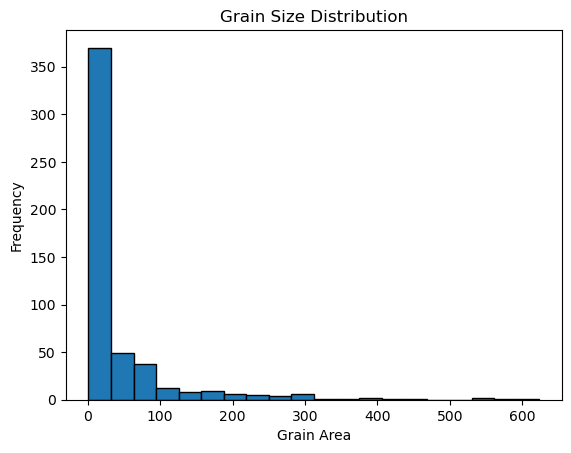

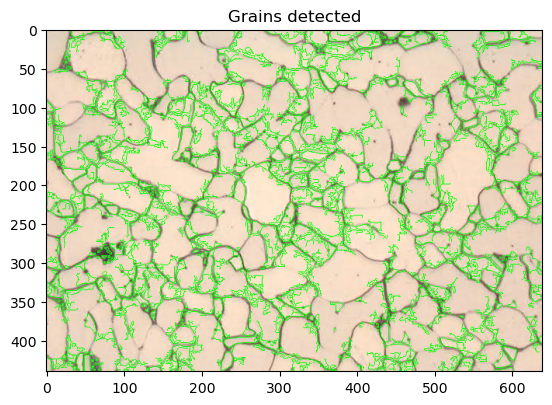

In [30]:
def load_image(image_path):
    image = cv.imread(image_path)
    return image
def preprocess_image(image):
    blurred = cv.GaussianBlur(image, (1, 1), 0)
    background = cv.morphologyEx(blurred, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE,(15,15)))
    subtracted = cv.subtract(blurred, background)
    gray = cv.cvtColor(subtracted, cv.COLOR_BGR2GRAY)
    binary = cv.Canny(gray, 10, 150)
    return binary
def find_contours(binary_image):
    contours, _ = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    return contours
def filter_contours(contours, min_area=1.0, max_area=500, max_aspect_ratio=6.0):
    filtered_contours = []
    for c in contours:
        area = cv.contourArea(c)
        if area < min_area:
            continue
            
        x, y, w, h = cv.boundingRect(c)
        aspect_ratio = float(w) / h
        if aspect_ratio > max_aspect_ratio:
            continue
            
        filtered_contours.append(c)
        
    return filtered_contours
def analyze_contours(contours):
    areas = [cv.contourArea(c) for c in contours]
    return areas
def main(image_path):
    image = load_image(image_path)
    binary_image = preprocess_image(image)
    contours = find_contours(binary_image)
    filtered_contours = filter_contours(contours)
    areas = analyze_contours(filtered_contours)
    contour_img = cv.drawContours(image, filtered_contours, -1, (0, 255, 0), 1)
    cv.imwrite('photos/grains detected.jpg', contour_img)
    
    print('Number of grains detected:', len(areas))
    print('Grain areas:', areas)
    print('Mean grain area:', np.mean(areas))
    print('Median grain area:', np.median(areas))
    print('Standard deviation of grain area:', np.std(areas))
    print('Minimun grain area:', np.min(areas))
    print('Maximum grain area:', np.max(areas))
    
    plt.hist(areas, bins=20, edgecolor='black')
    plt.title('Grain Size Distribution')
    plt.xlabel('Grain Area')
    plt.ylabel('Frequency')
    plt.show()

    plt.imshow(contour_img)
    plt.title('Grains detected')
    plt.show()

if __name__ == "__main__":
    image_path = 'photos/Carbon steel grain.jpeg'
    main(image_path)